In [1]:
import numpy as np
import pandas as pd
from PIL import Image as im
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,GlobalMaxPooling2D,Activation,MaxPooling2D
from tensorflow.nn import local_response_normalization as lrn
#create model

In [2]:
final_df = pd.read_csv(r"C:\Users\20190\Downloads\final_train.csv")
X = final_df.drop(columns = ['emotion'])
X = X.to_numpy()
x_temp = np.reshape(X,(28709,48,48,1))
x_temp = x_temp/255

y = final_df['emotion']
y = y.to_numpy()
b = np.zeros((y.size, y.max()+1))
b[np.arange(y.size),y] = 1

In [3]:
x_temp.shape

(28709, 48, 48, 1)

In [4]:
model = Sequential()

model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(48,48,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

model.fit(x_temp[2870:],b[2870:],epochs = 25,validation_data = (x_temp[0:2870],b[0:2870]))

C:\Users\20190\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
808/808 [==============================] - 13s 12ms/step - loss: 1.6851 - accuracy: 0.3297 - val_loss: 1.6009 - val_accuracy: 0.3784
Epoch 2/25
808/808 [==============================] - 9s 11ms/step - loss: 1.4848 - accuracy: 0.4297 - val_loss: 1.4483 - val_accuracy: 0.4446
Epoch 3/25
808/808 [==============================] - 9s 11ms/step - loss: 1.3486 - accuracy: 0.4853 - val_loss: 1.3883 - val_accuracy: 0.4777
Epoch 4/25
808/808 [==============================] - 9s 11ms/step - loss: 1.2442 - accuracy: 0.5313 - val_loss: 1.3606 - val_accuracy: 0.4899
Epoch 5/25
808/808 [==============================] - 9s 11ms/step - loss: 1.1573 - accuracy: 0.5693 - val_loss: 1.3505 - val_accuracy: 0.4997
Epoch 6/25
808/808 [==============================] - 9s 11ms/step - loss: 1.0680 - accuracy: 0.6061 - val_loss: 1.3976 - val_accuracy: 0.5066
Epoch 7/25
808/808 [==============================] - 9s 11ms/step - loss: 0.9898 - accuracy: 0.6374 - val_loss: 1.3887 - val_accuracy: 0.509

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_data_dir = 'train'
validation_data_dir = 'validation'
img_rows = 48
img_cols = 48
batch_size = 32
num_classes = 5

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    width_shift_range=0.4,
                    height_shift_range=0.4,
                    horizontal_flip=True,
                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(48,48),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                        validation_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)


nb_train_samples = 24176
nb_validation_samples = 3006
epochs=50

Found 24282 images belonging to 5 classes.
Found 5937 images belonging to 5 classes.


#### USE X_TEMP FOR NEURAL NETWORKS and X for LOGISTIC REGRESSION

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,GlobalMaxPooling2D,Activation,MaxPooling2D
from tensorflow.nn import local_response_normalization as lrn
#create model

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('our_model_1.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]

In [16]:
model = Sequential()

model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(48,48,1)))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('our_model_2.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]

history_model_2 = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

C:\Users\20190\AppData\Local\Temp/ipykernel_10472/1086752942.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model_2 = model.fit_generator(


Epoch 1/50
754/755 [============================>.] - ETA: 0s - loss: 1.5905 - accuracy: 0.2751
Epoch 00001: val_loss improved from inf to 1.68028, saving model to our_model_2.h5
755/755 [==============================] - 16s 20ms/step - loss: 1.5905 - accuracy: 0.2754 - val_loss: 1.6803 - val_accuracy: 0.3152
Epoch 2/50
755/755 [==============================] - ETA: 0s - loss: 1.5592 - accuracy: 0.2944
Epoch 00002: val_loss improved from 1.68028 to 1.62368, saving model to our_model_2.h5
755/755 [==============================] - 14s 19ms/step - loss: 1.5592 - accuracy: 0.2944 - val_loss: 1.6237 - val_accuracy: 0.3001
Epoch 3/50
755/755 [==============================] - ETA: 0s - loss: 1.5541 - accuracy: 0.2967
Epoch 00003: val_loss did not improve from 1.62368
755/755 [==============================] - 14s 19ms/step - loss: 1.5541 - accuracy: 0.2967 - val_loss: 1.6257 - val_accuracy: 0.3125
Epoch 4/50
753/755 [============================>.] - ETA: 0s - loss: 1.5526 - accuracy: 0.2

Epoch 29/50
755/755 [==============================] - ETA: 0s - loss: 1.3183 - accuracy: 0.4427
Epoch 00029: val_loss did not improve from 1.20487
755/755 [==============================] - 15s 19ms/step - loss: 1.3183 - accuracy: 0.4427 - val_loss: 1.3023 - val_accuracy: 0.4849
Epoch 30/50
752/755 [============================>.] - ETA: 0s - loss: 1.3186 - accuracy: 0.4470
Epoch 00030: val_loss did not improve from 1.20487
755/755 [==============================] - 15s 19ms/step - loss: 1.3193 - accuracy: 0.4465 - val_loss: 1.2291 - val_accuracy: 0.4772
Epoch 31/50
753/755 [============================>.] - ETA: 0s - loss: 1.3088 - accuracy: 0.4490
Epoch 00031: val_loss did not improve from 1.20487
755/755 [==============================] - 15s 19ms/step - loss: 1.3091 - accuracy: 0.4489 - val_loss: 1.6369 - val_accuracy: 0.4066
Epoch 32/50
755/755 [==============================] - ETA: 0s - loss: 1.3036 - accuracy: 0.4523
Epoch 00032: val_loss did not improve from 1.20487
755/755 [

In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_data_dir = 'train'
validation_data_dir = 'validation'
img_rows = 48
img_cols = 48
batch_size = 32
num_classes = 5

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                width_shift_range=0.4,
                height_shift_range=0.4,
                horizontal_flip=True,
                fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                color_mode='grayscale',
                target_size=(48,48),
                batch_size=batch_size,
                class_mode='categorical',
                shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                        validation_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)


model = Sequential()

# Block-1

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))




model.compile(loss='categorical_crossentropy',
              optimizer = Adam(0.001),
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('main_vgg_v2.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

callbacks = [checkpoint]

nb_train_samples = 24176
nb_validation_samples = 3006
epochs=50

history_vgg = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)


Found 24282 images belonging to 5 classes.
Found 5937 images belonging to 5 classes.


C:\Users\20190\AppData\Local\Temp/ipykernel_10472/3088893865.py:123: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg = model.fit_generator(


Epoch 1/50
754/755 [============================>.] - ETA: 0s - loss: 1.8816 - accuracy: 0.2335
Epoch 00001: val_loss improved from inf to 1.54352, saving model to main_vgg_v2.h5
755/755 [==============================] - 33s 41ms/step - loss: 1.8811 - accuracy: 0.2335 - val_loss: 1.5435 - val_accuracy: 0.3075
Epoch 2/50
755/755 [==============================] - ETA: 0s - loss: 1.5802 - accuracy: 0.2768
Epoch 00002: val_loss improved from 1.54352 to 1.53290, saving model to main_vgg_v2.h5
755/755 [==============================] - 31s 41ms/step - loss: 1.5802 - accuracy: 0.2768 - val_loss: 1.5329 - val_accuracy: 0.3199
Epoch 3/50
754/755 [============================>.] - ETA: 0s - loss: 1.5586 - accuracy: 0.2941
Epoch 00003: val_loss improved from 1.53290 to 1.53264, saving model to main_vgg_v2.h5
755/755 [==============================] - 31s 41ms/step - loss: 1.5586 - accuracy: 0.2942 - val_loss: 1.5326 - val_accuracy: 0.3165
Epoch 4/50
754/755 [============================>.] - ET

Epoch 29/50
754/755 [============================>.] - ETA: 0s - loss: 0.9788 - accuracy: 0.6177
Epoch 00029: val_loss improved from 0.78328 to 0.77167, saving model to main_vgg_v2.h5
755/755 [==============================] - 31s 41ms/step - loss: 0.9784 - accuracy: 0.6179 - val_loss: 0.7717 - val_accuracy: 0.6996
Epoch 30/50
754/755 [============================>.] - ETA: 0s - loss: 0.9802 - accuracy: 0.6190
Epoch 00030: val_loss did not improve from 0.77167
755/755 [==============================] - 31s 41ms/step - loss: 0.9799 - accuracy: 0.6192 - val_loss: 0.8182 - val_accuracy: 0.6848
Epoch 31/50
755/755 [==============================] - ETA: 0s - loss: 0.9699 - accuracy: 0.6289
Epoch 00031: val_loss did not improve from 0.77167
755/755 [==============================] - 31s 41ms/step - loss: 0.9699 - accuracy: 0.6289 - val_loss: 0.8320 - val_accuracy: 0.6700
Epoch 32/50
754/755 [============================>.] - ETA: 0s - loss: 0.9693 - accuracy: 0.6298
Epoch 00032: val_loss im

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


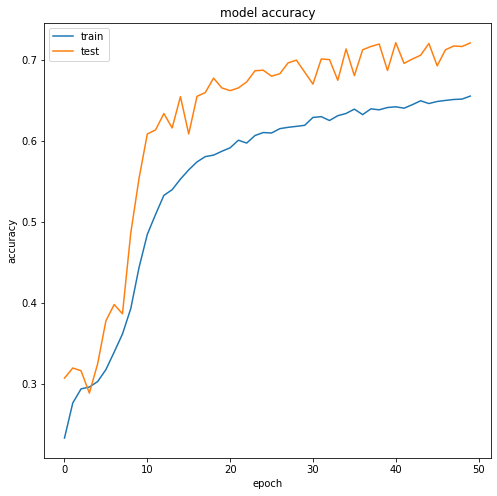

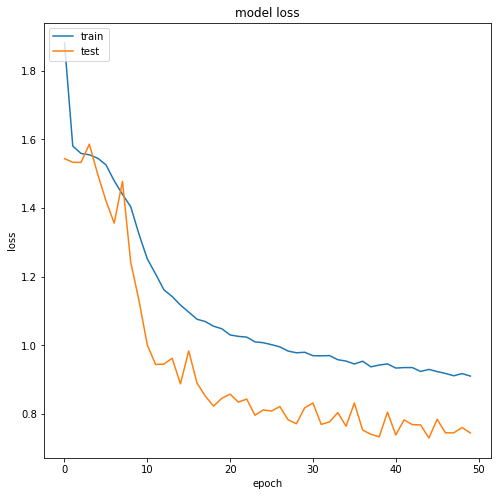

In [20]:
print(history_vgg.history.keys())
# summarize history for accuracy
fig = plt.figure(figsize = (8,8))
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('vgg_acc_graph.jpeg')
# summarize history for loss
fig = plt.figure(figsize = (8,8))
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('vgg_loss_graph.jpeg')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


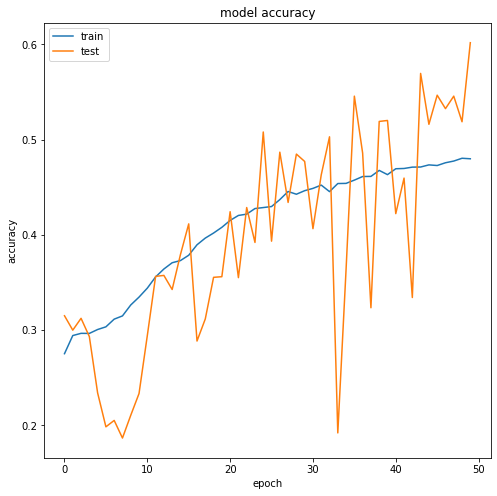

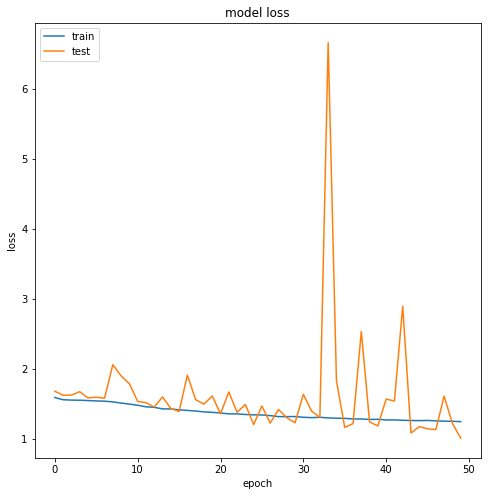

In [22]:
print(history_model_2.history.keys())
# summarize history for accuracy
fig = plt.figure(figsize = (8,8))
plt.plot(history_model_2.history['accuracy'])
plt.plot(history_model_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('our_model_acc_graph.jpeg')
# summarize history for loss
fig = plt.figure(figsize = (8,8))
plt.plot(history_model_2.history['loss'])
plt.plot(history_model_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('our_model_loss_graph.jpeg')

In [23]:
import pickle

In [28]:
filehandler = open('our_model_history', 'wb')
pickle.dump(history_model_2.history, filehandler)

In [29]:
filehandler = open('vgg_history', 'wb')
pickle.dump(history_vgg.history, filehandler)